In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# 发散型条形图

## version I

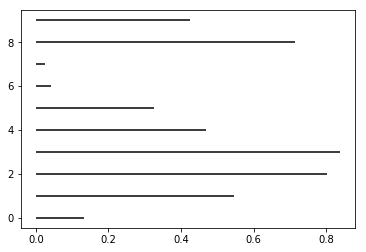

In [8]:
x = np.random.rand(10)
plt.hlines(np.arange(10),xmin=0,xmax=x)

## version II

In [14]:
x = np.sort(np.random.rand(10))

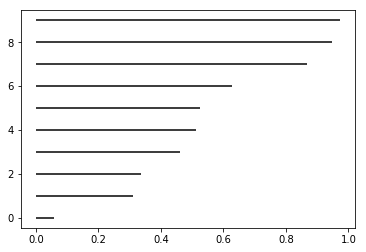

In [16]:
plt.hlines(np.arange(10),xmin=0,xmax=x)

## version III

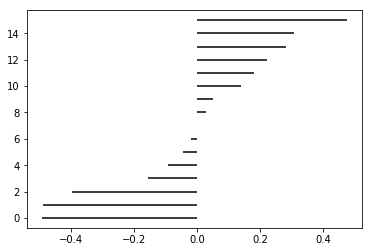

In [21]:
x = np.random.rand(16)
x = x-x.mean()
x = np.sort(x)
plt.hlines(np.arange(16),xmin=0,xmax=x)

## version IV

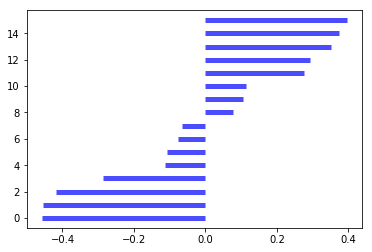

In [24]:
x = np.random.rand(16)
x = x-x.mean()
x = np.sort(x)
plt.hlines(np.arange(16),xmin=0,xmax=x,colors='b',alpha=0.7,linewidth=5)

## version V

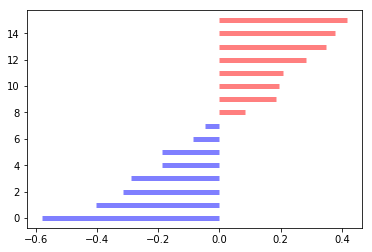

In [27]:
x = np.random.rand(16)
x = x - x.mean()
x = np.sort(x)
colors = []
for i in x:
    if i>0:
        colors.append('r')
    else:
        colors.append('b')
plt.hlines(np.arange(16),xmin=0,xmax=x,colors=colors,alpha=0.5,linewidth=5)

## exercise

In [32]:
df =pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

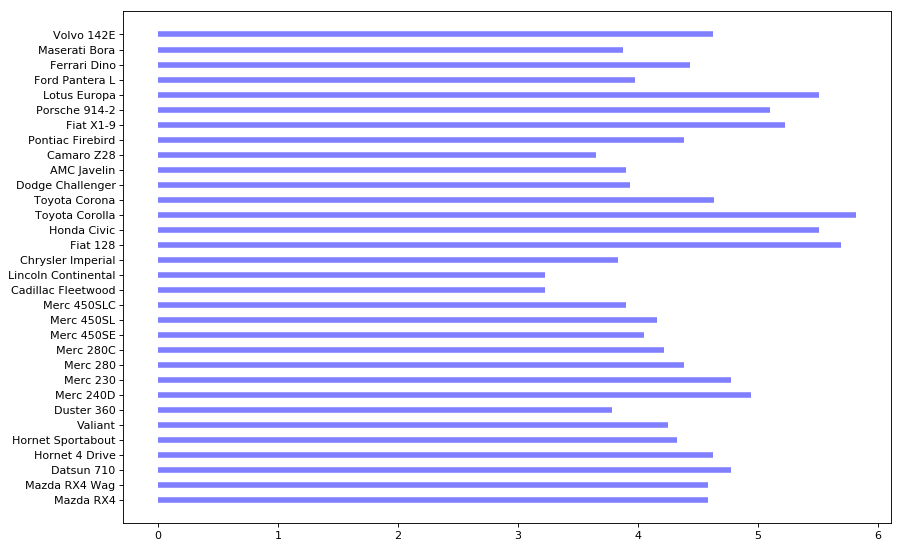

In [35]:
fig = plt.figure(figsize=(12,8),dpi=80)
ax = fig.add_axes((0.1,0.1,0.8,0.8))
ax.hlines(y=df.cars, xmin=0, xmax=df.mpg, 
          color='b', linewidth=5, alpha=.5)
plt.show()

In [42]:
# prepare data
x = df.loc[:,'mpg']
df['mpg_z'] = (x-x.mean())/x.std()

df.sort_values('mpg_z',inplace=True)
df.reset_index();

colors = ['g' if i>0 else 'r' for i in df['mpg_z']]

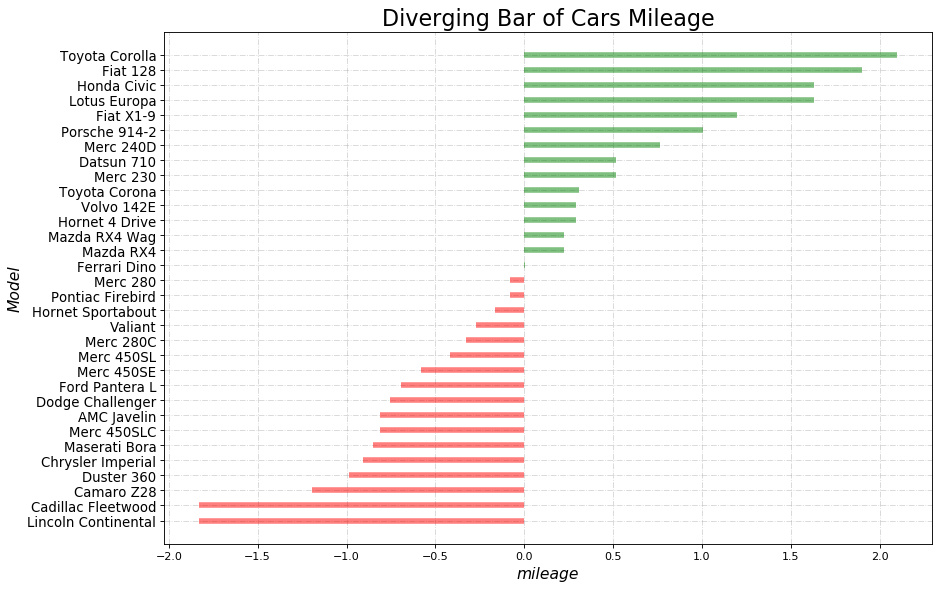

In [62]:
fig = plt.figure(figsize=(12,8),dpi=80)
ax = fig.add_axes((0.1,0.1,0.8,0.8))
ax.hlines(y=df.cars, xmin=0, xmax=df.mpg_z, 
          color=colors, linewidth=5, alpha=.5)
ax.set_ylabel('Model',fontsize=14,fontstyle='italic')
ax.set_xlabel('mileage',fontsize=14,fontstyle='italic')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(12)
ax.set_title('Diverging Bar of Cars Mileage', fontsize=20, color='k')
# 划分网格
plt.grid(linestyle='-.',alpha=0.5,axis='both',which='both')
plt.show()

# 发散型文本图

In [78]:
df =pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

# prepare data
x = df.loc[:,'mpg']
df['mpg_z'] = (x-x.mean())/x.std()

df.sort_values('mpg_z',inplace=True)
df = df.reset_index()

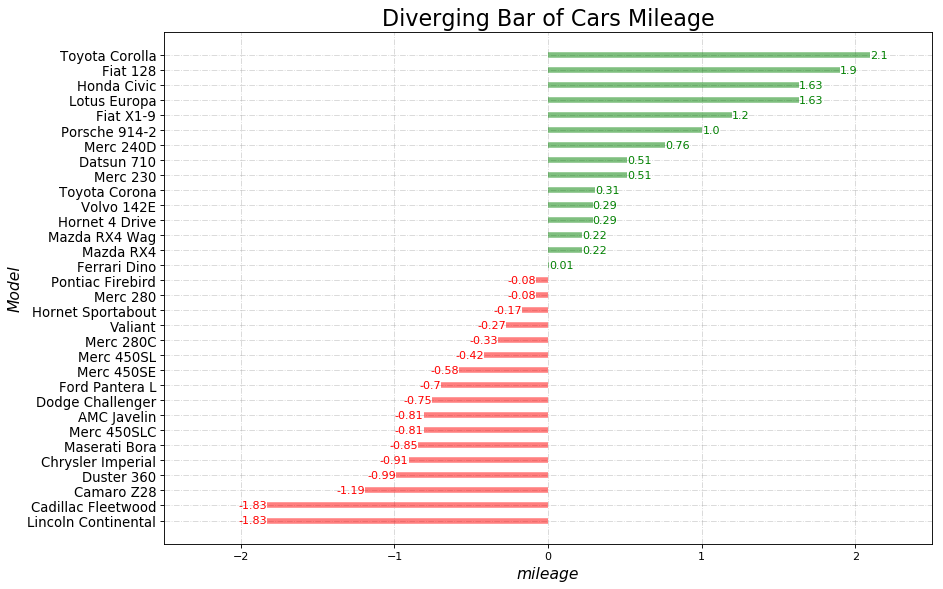

In [88]:
colors = ['g' if i>0 else 'r' for i in df['mpg_z']]

# plot
fig = plt.figure(figsize=(12,8),dpi=80)
ax = fig.add_axes((0.1,0.1,0.8,0.8))
ax.hlines(y=df.cars, xmin=0, xmax=df.mpg_z, 
          color=colors, linewidth=5, alpha=.5)

# plot text
for i in range(df.shape[0]):
    x = df.mpg_z[i]
    y = df.index[i]
    if x>0:
        ax.text(x,y,
                s=str(round(df.mpg_z[i],2)),
               horizontalalignment='left',verticalalignment='center',color='g')
    else:
        ax.text(x,y,s=str(round(df.mpg_z[i],2)),
               horizontalalignment='right',verticalalignment='center',color='r')
    

ax.set_ylabel('Model',fontsize=14,fontstyle='italic')
ax.set_xlabel('mileage',fontsize=14,fontstyle='italic',)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(12)
ax.set_title('Diverging Bar of Cars Mileage', fontsize=20, color='k')
ax.set_xlim(-2.5,2.5)
# 划分网格
plt.grid(linestyle='-.',alpha=0.5,axis='both',which='both')
plt.show()

# 发散型包点图

## version I

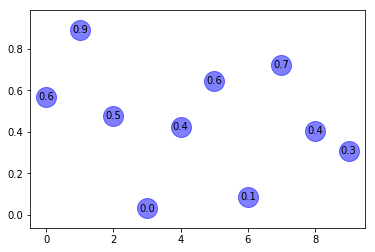

In [96]:
data = np.random.rand(10)
plt.scatter(np.arange(10),data,s=400,c='b',alpha=0.5)
for x,y in zip(np.arange(10),data):
    plt.text(x,y,round(y,1),verticalalignment='center',horizontalalignment='center',size=10)

## exercise

In [98]:
df =pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

In [103]:
x = df.loc[:,['mpg']]
df['mpg_z'] = (x-x.mean())/x.std()
df.sort_values('mpg_z',inplace=True)
df = df.reset_index()

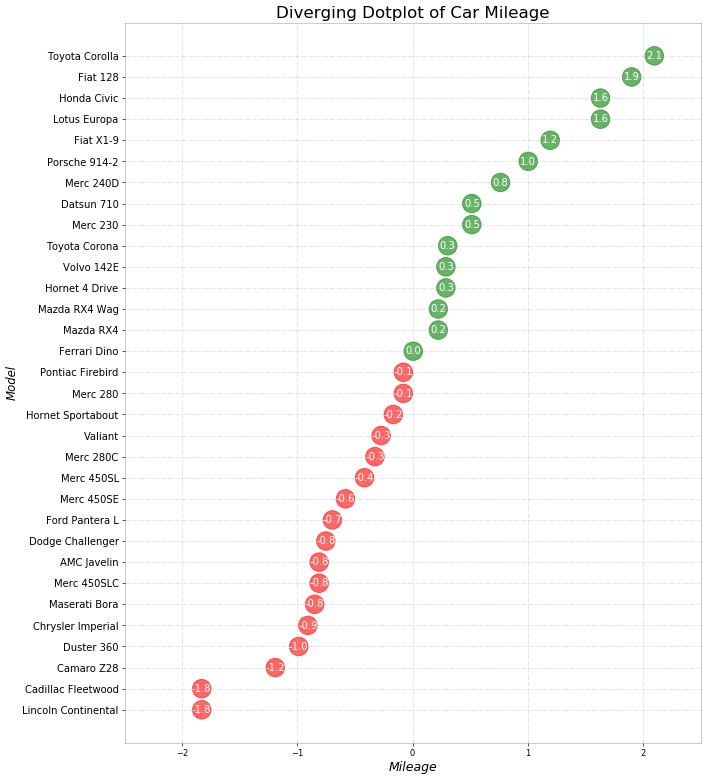

In [146]:
fig = plt.figure(figsize=(12,15),dpi=60)
ax = fig.add_axes((0.1,0.1,0.8,0.8))
colors = ['r' if x<0 else 'g' for x in df.mpg_z]
ax.scatter(df.mpg_z,df.index,s=500,alpha=0.6,color=colors)

for x,y in zip(df.mpg_z, df.index):
    ax.text(x,y,round(x,1),
            horizontalalignment='center',
           verticalalignment='center',
           fontsize=12,
           color='w')
# set title 
ax.set_title('Diverging Dotplot of Car Mileage', fontsize=20)

# set xlabel and ylabel
ax.set_xlabel('Mileage',fontsize=15,fontstyle='italic')
ax.set_ylabel('Model',fontsize=14,fontstyle='italic')
# set xlim
ax.set_xlim(-2.5,2.5)

# set tick
ax.yaxis.set_ticks(df.index) # set tick locator
ax.yaxis.set_ticklabels(df.carname,fontsize=12) # set tick label

# 边缘弱化
for spine in ax.spines:
    ax.spines[spine].set(alpha=.3)
plt.grid(linestyle='-.',alpha=0.5,axis='both',which='both')
plt.show()

In [142]:
ax.spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x7fbadb3d6160>),
             ('right', <matplotlib.spines.Spine at 0x7fbadd348ba8>),
             ('bottom', <matplotlib.spines.Spine at 0x7fbadd348ef0>),
             ('top', <matplotlib.spines.Spine at 0x7fbadd348860>)])

# 带标记的发散型棒棒糖图

In [7]:
import matplotlib.patches as patches

## version I

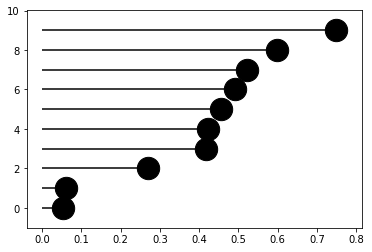

In [152]:
x = np.random.rand(10)
x.sort()
plt.hlines(np.arange(10),xmin=0,xmax=x)
plt.scatter(x,np.arange(10),s=500,color='k')

## exercise

In [3]:
df =pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

In [157]:
x = df.loc[:,['mpg']]
df['mpg_z'] = (x-x.mean())/x.std()
df.sort_values('mpg_z',inplace=True)
df = df.reset_index()

In [168]:
colors = ['orange' if x=='Fiat X1-9' else 'k' for x in df.cars]


In [171]:
size = [600 if x=='Fiat X1-9' else 300 for x in df.cars]

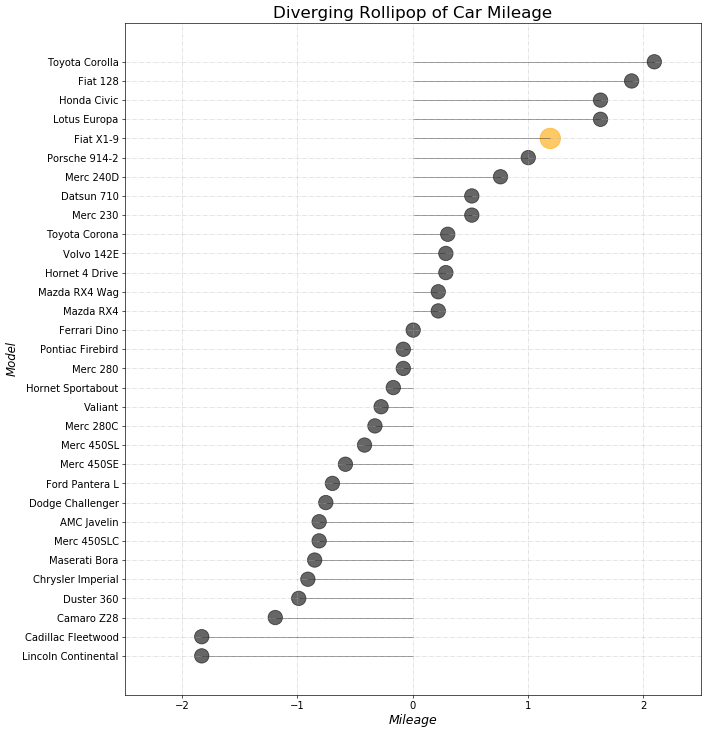

In [172]:
fig = plt.figure(figsize=(12,14),dpi=60)
ax = fig.add_axes((0.1,0.1,0.8,0.8))

ax.hlines(df.index,xmin=0,xmax=df.mpg_z,color='k',alpha=0.4,linewidth=1)

ax.scatter(df.mpg_z,df.index,s=size,color=colors,alpha=.6)

# set title 
ax.set_title('Diverging Rollipop of Car Mileage', fontsize=20)

# set xlabel and ylabel
ax.set_xlabel('Mileage',fontsize=15,fontstyle='italic')
ax.set_ylabel('Model',fontsize=14,fontstyle='italic')
# set xlim
ax.set_xlim(-2.5,2.5)
# set tick
plt.yticks(df.index,df.carname,fontsize=12)
plt.xticks(fontsize=12)

plt.grid(linestyle='-.',alpha=0.5,axis='both',which='both')
plt.show()

### 通过rectangle来强调某些点

In [184]:
x = df.loc[:,['mpg']]
df['mpg_z'] = (x-x.mean())/x.std()
df.sort_values('mpg_z',inplace=True)
df = df.reset_index()

ValueError: cannot insert level_0, already exists

In [174]:
colors = ['orange' if x=='Fiat X1-9' else 'k' for x in df.cars]
size = [600 if x=='Fiat X1-9' else 300 for x in df.cars]

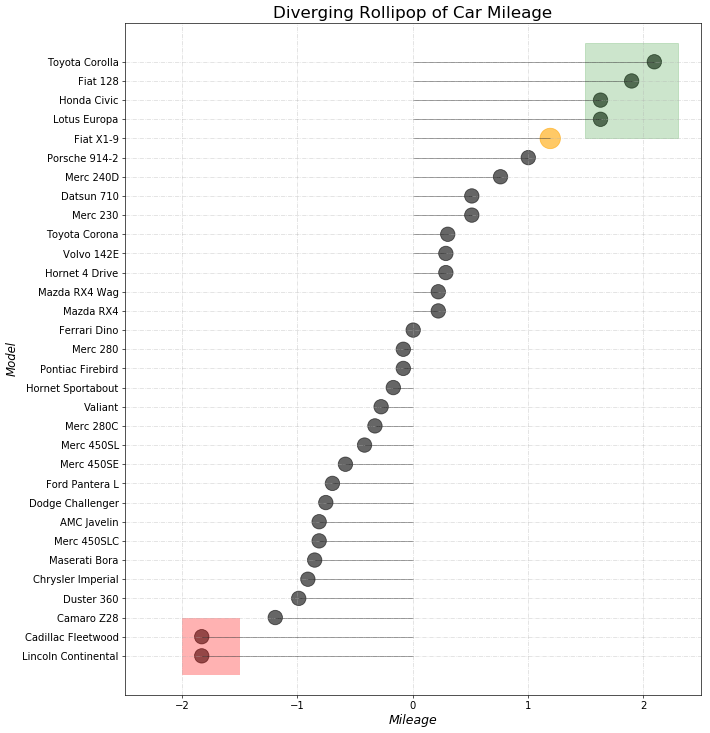

In [185]:
fig = plt.figure(figsize=(12,14),dpi=60)
ax = fig.add_axes((0.1,0.1,0.8,0.8))

ax.hlines(df.index,xmin=0,xmax=df.mpg_z,color='k',alpha=0.4,linewidth=1)

ax.scatter(df.mpg_z,df.index,s=size,color=colors,alpha=.6)

p1 = patches.Rectangle((1.5,27),width=0.8,height=5,
                      facecolor='g',
                      alpha=0.2,
                     edgecolor='g',
                     fill=True,
                     )
p2 = patches.Rectangle((-2.0,-1), width=0.5, height=3, facecolor='r',alpha=.3)
ax.add_patch(p1)
ax.add_patch(p2)
# set title 
ax.set_title('Diverging Rollipop of Car Mileage', fontsize=20)

# set xlabel and ylabel
ax.set_xlabel('Mileage',fontsize=15,fontstyle='italic')
ax.set_ylabel('Model',fontsize=14,fontstyle='italic')
# set xlim
ax.set_xlim(-2.5,2.5)
# set tick
plt.yticks(df.index,df.carname,fontsize=12)
plt.xticks(fontsize=12)

plt.grid(linestyle='-.',alpha=0.5,axis='both',which='both')
plt.show()

### 添加注释

Text(0.4, 0.3, 'test3')

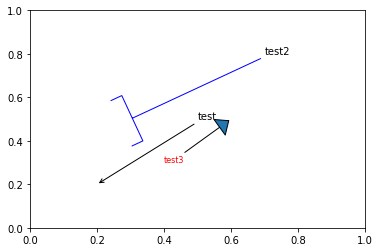

In [19]:
# annotate demo
plt.annotate('test', (0.2,0.2), (0.5,0.5), 
             arrowprops={'arrowstyle':'->,head_length=0.4, head_width=0.2',
                        'color':'k',})
plt.annotate('test2',(0.3,0.5),(0.7,0.8),
            arrowprops={'arrowstyle':'-[,widthB=2.5,lengthB=1.2',
                       'color':'b',
                       'linewidth':1})
plt.annotate('test3',(0.6,.5),(0.4,0.3),
            arrowprops={'arrowstyle':'-|>,head_length=1.4,head_width=1.2'},
            fontsize=8,color='r')

In [20]:
# prepare data
x = df.loc[:,['mpg']]
df['mpg_z'] = (x-x.mean())/x.std()
df.sort_values('mpg_z',inplace=True)
df = df.reset_index()

In [21]:
colors = ['orange' if x=='Fiat X1-9' else 'k' for x in df.cars]
size = [600 if x=='Fiat X1-9' else 300 for x in df.cars]

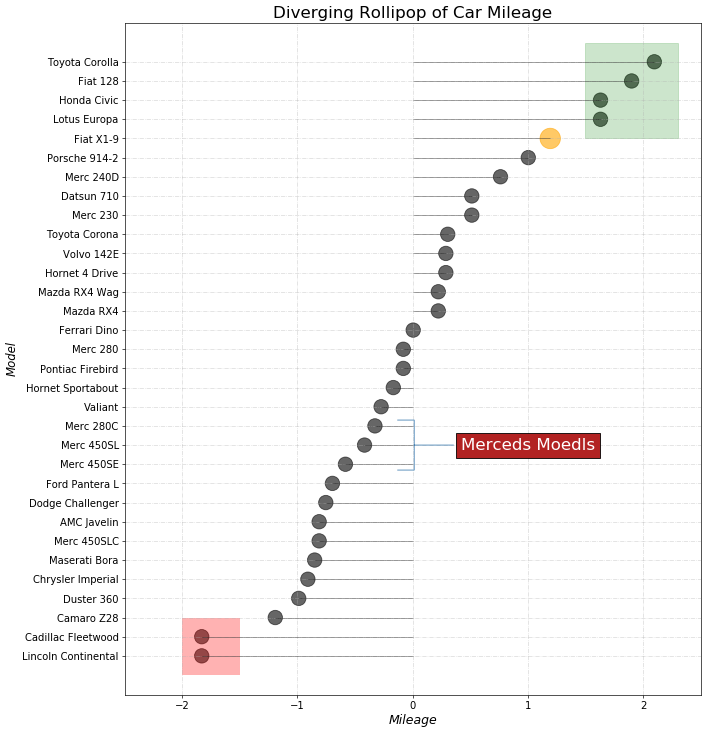

In [29]:
fig = plt.figure(figsize=(12,14),dpi=60)
ax = fig.add_axes((0.1,0.1,0.8,0.8))

ax.hlines(df.index,xmin=0,xmax=df.mpg_z,color='k',alpha=0.4,linewidth=1)

ax.scatter(df.mpg_z,df.index,s=size,color=colors,alpha=.6)

# set patch(rectangle)
p1 = patches.Rectangle((1.5,27),width=0.8,height=5,
                      facecolor='g',
                      alpha=0.2,
                     edgecolor='g',
                     fill=True,
                     )
p2 = patches.Rectangle((-2.0,-1), width=0.5, height=3, facecolor='r',alpha=.3)
ax.add_patch(p1)
ax.add_patch(p2)

# set annotate
ax.annotate('Merceds Moedls', xy=(0,11), xytext=(1,11),
           xycoords='data',
            arrowprops={'arrowstyle':'-[,widthB=1.5,lengthB=1.',
                       'color':'steelblue',
                       'linewidth':1},
           color='w', fontsize=20,
           ha='center', va='center',
           bbox={'boxstyle':'square', 'fc':'firebrick'})

# set title 
ax.set_title('Diverging Rollipop of Car Mileage', fontsize=20)

# set xlabel and ylabel
ax.set_xlabel('Mileage',fontsize=15,fontstyle='italic')
ax.set_ylabel('Model',fontsize=14,fontstyle='italic')

# set xlim
ax.set_xlim(-2.5,2.5)

# set tick
plt.yticks(df.index,df.carname,fontsize=12)
plt.xticks(fontsize=12)

plt.grid(linestyle='-.',alpha=0.5,axis='both',which='both')
plt.show()

# 面积图

## version I

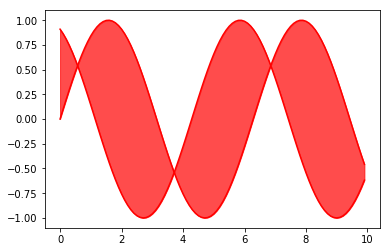

In [20]:
x = np.arange(0,10,10/100)
y1 = np.sin(x)
plt.plot(x,y1,color='r')
y2 = np.sin(x+2)
plt.plot(x,y2,color='r')
plt.fill_between(x,y1,y2,color='r',alpha=.7)

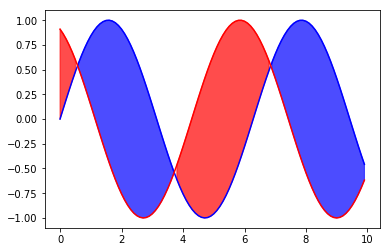

In [28]:
x = np.arange(0,10,10/100)
y1 = np.sin(x)
plt.plot(x,y1,color='b')
y2 = np.sin(x+2)
plt.plot(x,y2,color='r')
plt.fill_between(x,y1,y2,where=y1>y2,color='b',alpha=.7,
                 interpolate=False)
plt.fill_between(x,y1,y2,where=y1<y2, color='r',alpha=.7,
                interpolate=False)

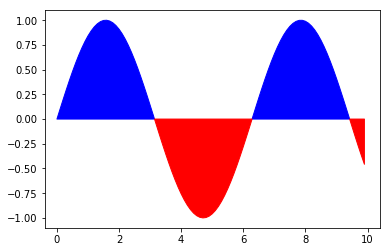

In [47]:
x = np.arange(0,10,10/100)
y1 = np.sin(x)
plt.fill_between(x,y1,0,where=y1>0,color='b',interpolate=True)
plt.fill_between(x,y1,0,where=y1<0,color='r',interpolate=True)

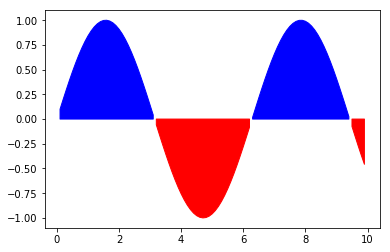

In [48]:
x = np.arange(0,10,10/100)
y1 = np.sin(x)
plt.fill_between(x,y1,0,where=y1>0,color='b')
plt.fill_between(x,y1,0,where=y1<0,color='r')

## exercise

In [33]:
df =pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")

In [41]:
df = df[:100]
df['date1'] = pd.to_datetime(df.date)
income = df.psavert.diff().fillna(0)
re = (income /df.psavert.shift(1)).fillna(0)*100

In [60]:
m = df.date1.dt.month_name()
y = df.date1.dt.year
xtick_labels = [str(m1)[:3b].upper()+'-'+str(y1) for m1,y1 in zip(m,y)]

In [61]:
xtick_labels

['JUL-1967',
 'AUG-1967',
 'SEP-1967',
 'OCT-1967',
 'NOV-1967',
 'DEC-1967',
 'JAN-1968',
 'FEB-1968',
 'MAR-1968',
 'APR-1968',
 'MAY-1968',
 'JUN-1968',
 'JUL-1968',
 'AUG-1968',
 'SEP-1968',
 'OCT-1968',
 'NOV-1968',
 'DEC-1968',
 'JAN-1969',
 'FEB-1969',
 'MAR-1969',
 'APR-1969',
 'MAY-1969',
 'JUN-1969',
 'JUL-1969',
 'AUG-1969',
 'SEP-1969',
 'OCT-1969',
 'NOV-1969',
 'DEC-1969',
 'JAN-1970',
 'FEB-1970',
 'MAR-1970',
 'APR-1970',
 'MAY-1970',
 'JUN-1970',
 'JUL-1970',
 'AUG-1970',
 'SEP-1970',
 'OCT-1970',
 'NOV-1970',
 'DEC-1970',
 'JAN-1971',
 'FEB-1971',
 'MAR-1971',
 'APR-1971',
 'MAY-1971',
 'JUN-1971',
 'JUL-1971',
 'AUG-1971',
 'SEP-1971',
 'OCT-1971',
 'NOV-1971',
 'DEC-1971',
 'JAN-1972',
 'FEB-1972',
 'MAR-1972',
 'APR-1972',
 'MAY-1972',
 'JUN-1972',
 'JUL-1972',
 'AUG-1972',
 'SEP-1972',
 'OCT-1972',
 'NOV-1972',
 'DEC-1972',
 'JAN-1973',
 'FEB-1973',
 'MAR-1973',
 'APR-1973',
 'MAY-1973',
 'JUN-1973',
 'JUL-1973',
 'AUG-1973',
 'SEP-1973',
 'OCT-1973',
 'NOV-1973',

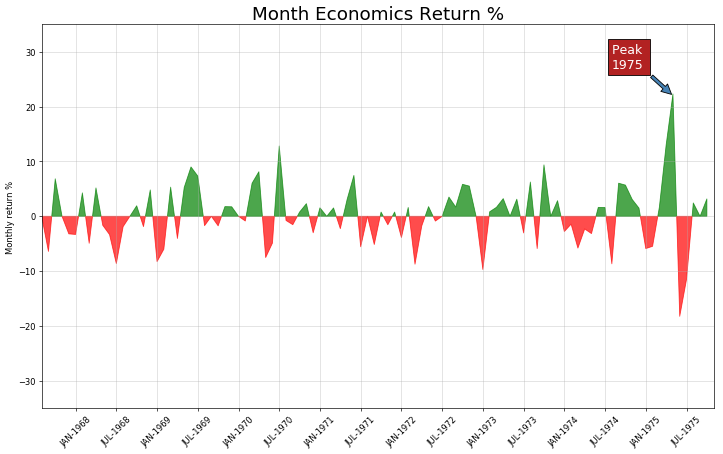

In [73]:
fig = plt.figure(figsize=(14,8),dpi=60)
ax = fig.add_axes((0.1,0.1,0.8,0.8))

# fill between
ax.fill_between(np.arange(100),re, 0, 
                where=re>0, color='g',alpha=0.7,interpolate=True)
ax.fill_between(np.arange(100),re,0, 
                where=re<0, color='r',alpha=.7,interpolate=True)
# set annotate
ax.annotate('Peak \n1975', xy=(94,22), xytext=(85,27),
           arrowprops={'fc':'steelblue','shrink':0.05},
           bbox={'boxstyle':'square','fc':'firebrick'},
           color='w', fontsize=15)

# set x tick
m = df.date1.dt.month_name()
y = df.date1.dt.year
xtick_labels = [str(m1)[:3].upper()+'-'+str(y1) for m1,y1 in zip(m,y)]
ax.xaxis.set_ticks(np.arange(100)[::6])
ax.xaxis.set_ticklabels(xtick_labels[::6],rotation=45)

# set xlim and ylim
ax.set_ylim(-35,35)
ax.set_xlim(1,100)

# set grid
ax.grid(alpha=.5)

ax.set_title("Month Economics Return %", fontsize=22)
ax.set_ylabel("Monthly return %")
plt.show()